<a href="https://colab.research.google.com/github/georges-17/Social-Media-Comments-Classifier/blob/main/Social_Media_Comments_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of Project

 Enganging in conversations online can be difficult, due to the threat of abuse and harrasement. This could lead to many social media users to stop expressing themselves and give up on seeking different opinions. Diffrent platforms struggle to deal with enabling healthy constructive discussions, resulting in many communities restricting or entirely disabling user comments.

In this project we are seeking to improve online conversations, by focussing on the negative online behaviors and toxic comments, who are rude, disrespectful and make someone not participate in a discussion.

In this Model, we are trying to detect negative comments and classify them on a toxicity spectrum that ranges from toxic, severe toxic, obscene, threat, insult, identity hate.

# Dataset
This dataset contains, an id , and comment_textand the toxcicty spectrum, the comments are rated 0 and 1
                            


# Libaries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Some examples from the datasets and there toxicity placement

In [ ]:
data.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
data[data.columns[2:]].iloc[0]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: int64

In [ ]:
data.iloc[16]['comment_text']

"Bye! \n\nDon't look, come or think of comming back! Tosser."

In [ ]:
data[data.columns[2:]].iloc[16]

toxic            1
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 16, dtype: int64

In [ ]:
data.iloc[2348]['comment_text']

'HOW ABOUT A LITTLE FIRE, NATE!  (Throws fireballs at nate!) I STOLE WIKIPEDIA! I STOLE WIKIPEDIA! FUCK WIKIPEDIA! FUCK!'

In [ ]:
data[data.columns[2:]].iloc[2348]

toxic            1
severe_toxic     0
obscene          1
threat           0
insult           0
identity_hate    0
Name: 2348, dtype: int64

In [ ]:
data.shape

(159571, 8)

# Preprocessing and Tokenizing Data

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X =data['comment_text']
y=data[data.columns[2:]].values

In [ ]:
vectorizer = TextVectorization(max_tokens =200000, standardize='lower_and_strip_punctuation',
    split='whitespace', output_sequence_length = 1800, output_mode ='int' )

turning the comment text's type from a object to a into a numpy array(intger)

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [ ]:
v_text= vectorizer(X.values)

In [ ]:
v_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

Tensorflow data pipeline

MCSHBAP - map, cache, shuffle, batch, prefetch from_tensor_slices

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((v_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
tr = dataset.take(int(len(dataset)*.7))
val= dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
len(test) # batch

997

In [ ]:
len(tr) #batch

6981

# Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Embedding ,Dense

In [ ]:
model = Sequential()
# embedding layer
model.add(Embedding(200001, 32))
# LSTM Layer using a bidirectinal layer also
model.add(Bidirectional(LSTM(32, activation='tanh')))
#Dense Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation ='relu'))
model.add(Dense(126, activation ='relu'))
model.add(Dense(254, activation ='relu'))
model.add(Dense(124, activation='relu'))
model.add(Dense(200, activation='relu'))
#Final Layer, there should be 6 outputs
model.add(Dense(6, activation ='sigmoid'))

Compile and Train model

In [ ]:
model.compile(loss= 'BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_8 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 126)               32382     
                                                                 
 dense_10 (Dense)            (None, 254)               32258     
                                                      

In [ ]:
m = model.fit(tr, epochs=10, validation_data = val)

Epoch 1/10
6981/6981 [==============================] - 773s 109ms/step - loss: 0.0657 - accuracy: 0.9889 - val_loss: 0.0468 - val_accuracy: 0.9943
Epoch 2/10
6981/6981 [==============================] - 751s 108ms/step - loss: 0.0474 - accuracy: 0.9941 - val_loss: 0.0421 - val_accuracy: 0.9940
Epoch 3/10
6981/6981 [==============================] - 765s 110ms/step - loss: 0.0426 - accuracy: 0.9940 - val_loss: 0.0385 - val_accuracy: 0.9942
Epoch 4/10
6981/6981 [==============================] - 731s 105ms/step - loss: 0.0393 - accuracy: 0.9940 - val_loss: 0.0345 - val_accuracy: 0.9940
Epoch 5/10
6981/6981 [==============================] - 737s 106ms/step - loss: 0.0368 - accuracy: 0.9941 - val_loss: 0.0329 - val_accuracy: 0.9939
Epoch 6/10
6981/6981 [==============================] - 679s 97ms/step - loss: 0.0340 - accuracy: 0.9942 - val_loss: 0.0326 - val_accuracy: 0.9948
Epoch 7/10
6981/6981 [==============================] - 671s 96ms/step - loss: 0.0326 - accuracy: 0.9941 - val_lo

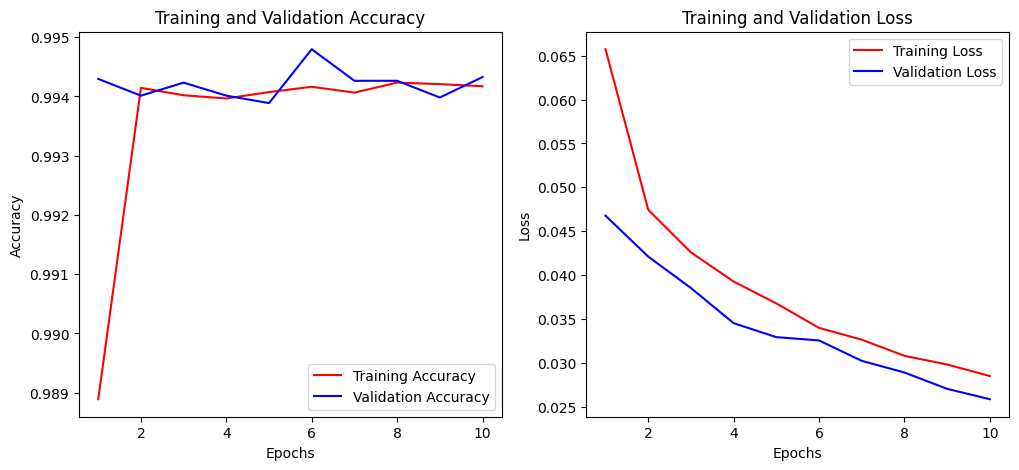

In [ ]:
def plot_training_history(history):
    # Extract accuracy, loss, and validation loss data
    acc = history.history['accuracy']
    val_acc =history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create an array representing the number of epochs
    epochs = range(1, len(acc) + 1)

    # Create subplots for accuracy and loss
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs ,val_acc,'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Usage example:
# Replace 'history' with your actual model's history object
plot_training_history(m)


# Make Prediction

In [ ]:
input_text = vectorizer('i hate you')

In [ ]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 95ms/step


array([[0.936802  , 0.00112256, 0.05401555, 0.00751057, 0.1283084 ,
        0.02890841]], dtype=float32)

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X,batch_y = test.as_numpy_iterator().next()

In [ ]:
t = (model.predict(batch_X)>0.6).astype(int)

1/1 [==============================] - 0s 327ms/step


In [ ]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


# Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

instantiating these metrics , it allows us to add the results over time to get an accurate metric

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

looping through each batch in the data pipline

In [ ]:
for batch in test.as_numpy_iterator():
  #unpack batch
  x_true, y_true= batch
  # Make prediction
  yhat = model.predict(x_true)
   # faltten prediction into one vector
  y_true = y_true.flatten()
  y_hat = yhat.flatten()

  pre.update_state(y_true,y_hat)
  re.update_state(y_true,y_hat)
  acc.update_state(y_true,y_hat)


NameError: ignored

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuraccy:{acc.result().numpy()}')

Precision: 0.9131274223327637, Recall:0.8124821186065674, Accuraccy:0.5386158227920532
